In [1]:
import pandas as pd
import sqlite3
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


db_path = 'data.db'
connection = sqlite3.connect(db_path)

queryTrain = "SELECT * FROM teams WHERE year < 10 ORDER BY year"
train_data = pd.read_sql_query(queryTrain, connection)

queryTest = "SELECT * FROM teams WHERE year = 10"
test_data = pd.read_sql_query(queryTest, connection)

# Define your features (X) and target (y) for training data
X_train = train_data.drop(columns=['playoff', 'lgID', 'tmID', 'franchID','confID','divID', 'seeded', 'semis','finals','name', 'firstRound', 'arena', 'rank'])  # Exclude non-feature columns
y_train = train_data['playoff']  # Your target variable

# Define your features (X) and target (y) for test data
X_test = test_data.drop(columns=['playoff', 'lgID', 'tmID', 'franchID','confID','divID', 'seeded', 'semis','finals','name', 'firstRound', 'arena', 'rank'])  # Exclude non-feature columns
y_test = test_data['playoff']  # Your target variable

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

#print(tree.export_text(clf))
""" print(X_train.columns)
print(X_train['homeL'])
 """
#print(tree.export_text(clf))

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy: .2f}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Accuracy:  0.69
              precision    recall  f1-score   support

           N       0.56      1.00      0.71         5
           Y       1.00      0.50      0.67         8

    accuracy                           0.69        13
   macro avg       0.78      0.75      0.69        13
weighted avg       0.83      0.69      0.68        13

Confusion Matrix:
[[5 0]
 [4 4]]


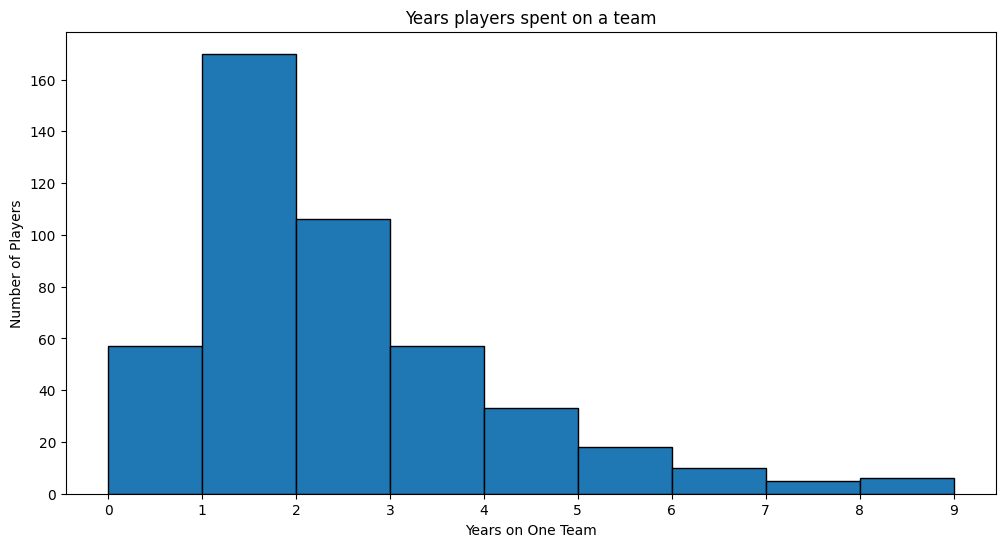

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file
df = pd.read_csv("./Dataset/players_teams.csv")

# Sort the DataFrame by player and year
df = df.sort_values(by=['playerID', 'year', 'tmID'])

# Initialize variables to keep track of the current team and player
current_player = ""
current_team = ""
start_year = 0
team_durations = []

# Iterate through the DataFrame to calculate the years on each team
for index, row in df.iterrows():
    player = row['playerID']
    team = row['tmID']
    year = row['year']

    if player != current_player:
        # New player, reset variables
        current_player = player
        current_team = team
        start_year = year
    elif team != current_team:
        # Player changed teams, calculate duration and update current team
        duration = year - start_year
        team_durations.append(duration)
        current_team = team
        start_year = year

# Create a histogram to visualize the distribution of years on one team
plt.figure(figsize=(12, 6))
plt.hist(team_durations, bins=range(min(team_durations), max(team_durations) + 1), edgecolor='k')
plt.xlabel('Years on One Team')
plt.ylabel('Number of Players')
plt.title('Years players spent on a team')
plt.xticks(range(min(team_durations), max(team_durations) + 1))
plt.show()
